In [1]:
import sys
import numpy as np
from package.filtredcells import *
from itertools import product
from package.tessellations import *
from matplotlib import colormaps as cm

# Cube Tessellation on Torus 2d

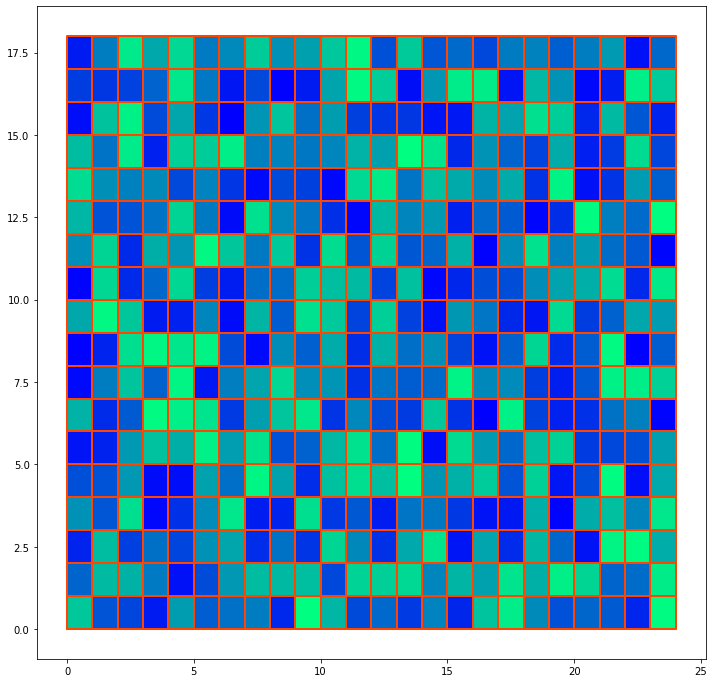

48


In [2]:
n, m = 24, 18
filtration = np.arange(n*m) / (n*m-1)
np.random.shuffle(filtration)
fc = get_cubical_tessellation_on_torus2d(n, m, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

print(sys.getsizeof(fc))

# Hexagonal Tessellation on Torus 2d

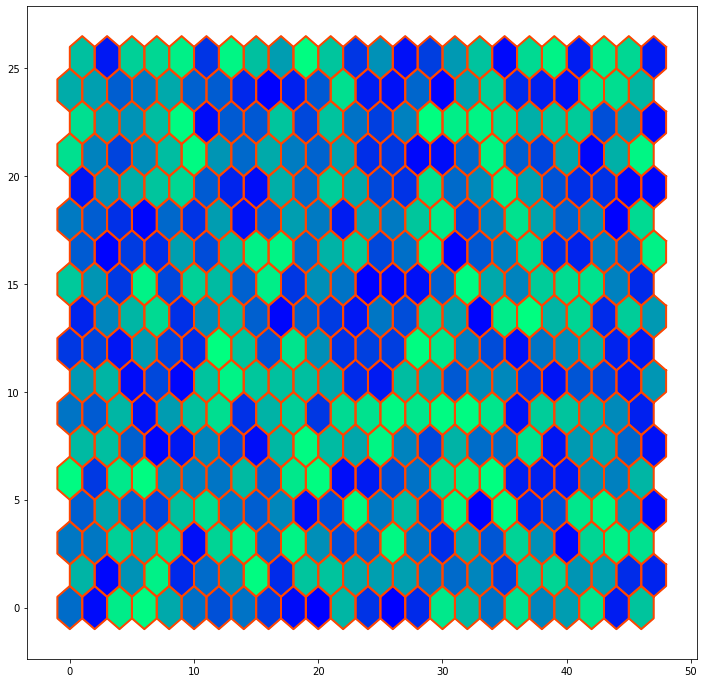

,Birth,Dimension
108,0.001351,0
109,0.499103,1
110,0.616053,1
111,0.998669,2


In [3]:
n, m, d = 24, 18, 9
filtration = np.random.random(n*m)
fc = get_hexagonal_tessolation_on_torus2d(n, m, d, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

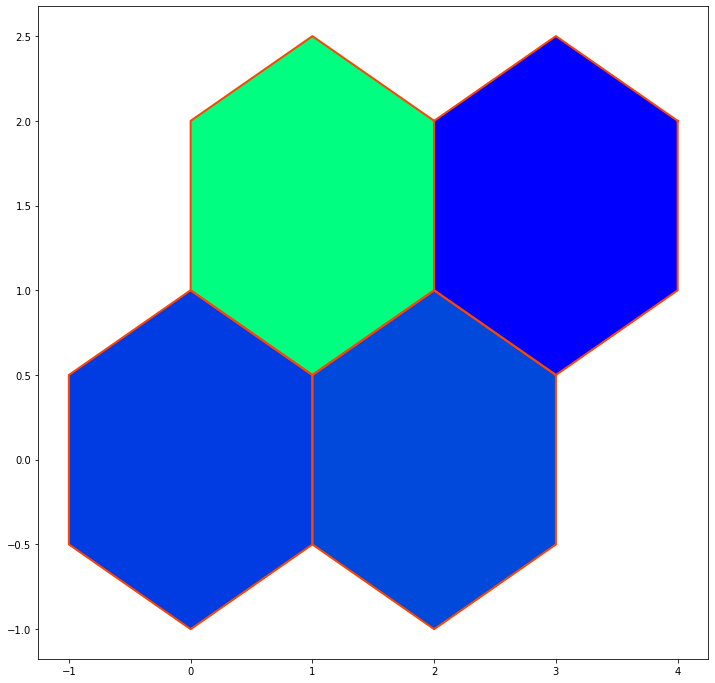

,Birth,Dimension
0,0.086685,0
1,0.341089,2
2,0.976107,2
3,0.976107,2
4,0.976107,2
5,0.976107,2


In [4]:
n = 2
filtration = np.random.random(n*n)
fc = get_hexagonal_tessolation_on_torus2d(n, filtration=filtration)

plt.figure(figsize=(12, 12))
fc.draw_filtration()
plt.show()

fc.initialize_complex(dimension=3)
fc.get_giant_cycles()

# Cube Tessellation on Torus 3d

In [5]:
n, m, k = 10, 10, 10
filtration = np.arange(n*m*k) / (n*m*k)
fc = get_cubical_tessellation_on_torus3d(n, m, k, filtration=filtration)

fc.initialize_complex(dimension=4)
fc.get_giant_cycles()

,Birth,Dimension
0,0.000,0
1,0.009,1
2,0.090,1
3,0.099,2
4,0.900,1
5,0.909,2
6,0.990,2
7,0.999,3


# Otcahedron Tessellation on Torus 3d

In [6]:
def get_octehedron_tessellation_on_torus3d(n, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    if (np.array([n, m, k]) == 1).any():
        unit_simplices = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    else:
        unit_simplices = np.array([[[ 1,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    
    verts = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    verts = verts[verts.sum(axis=1) % 2 == 0]
    cells = np.array([[v + s for s in unit_simplices] for v in verts])
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([1, 2*m, 4*m*k])
    cells = cells.sum(axis=-1)
    
        
    for pair in np.array([np.unique(cells), np.arange(len(np.unique(cells)))]).transpose():
        cells[cells == pair[0]] = pair[1]
        
    if filtration is None:
        filtration = np.zeros(n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    return fc

In [7]:
def get_octehedron_tessellation_on_torus3d(n, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    if (np.array([n, m, k]) == 1).any():
        unit_simplices = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    else:
        unit_simplices = np.array([[[ 1,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                                   [[ 1,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
        
    centers = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    centers = centers[centers.sum(axis=1) % 2 == 0]
    cells = np.array([[center + simplex for simplex in unit_simplices] for center in centers])
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([4*m*k, 2*k, 1])
    cells = cells.sum(axis=-1)
    
    if filtration is None:
        filtration = np.zeros(4*n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    return fc

In [8]:
def get_octehedron_tessellation_on_torus3d(n: int, m=None, k=None, filtration=None):
    """
    Returns FiltredCells for octehedron tessellation on 3-dimensionall torus.
    
    Parameters:
    -----------
    n, m, k: int
        Half sizes of tessellation
        If m is None, that becomes same as n
        If k is None, that becames same as m
    
    filtration : array length 4*n*m*k or None
        Filtration values for cells. If that's None, that becames zeros.
        
    Returns:
    --------
    fc : FiltredCells
    """
    if m is None:
        m = n
    if k is None:
        k = m
    verts = np.array(list(product(np.arange(2*n), np.arange(2*m), np.arange(2*k))))
    verts = verts[verts.sum(axis=1) % 2 == 0]
    unit_cell = np.array([[[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
                          [[ 0,  0,  0], [-1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
#    unit_cell = np.array([[[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0,  1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0,  1,  0], [ 0,  0, -1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0,  1]], 
#                          [[-1,  0,  0], [ 1,  0,  0], [ 0, -1,  0], [ 0,  0, -1]]])
    cells = np.array([vert + unit_cell for vert in verts])
    cells %= np.array([2*n, 2*m, 2*k])
    cells *= np.array([1, 2*n, 4*n*m])
    cells = cells.sum(axis=-1)
    
    if filtration is None:
        filtration = np.zeros(4*n*m*k)
    fc = FiltredCells(cells, filtration=filtration)
    
    if True:
        if m is None:
            m = n
        if k is None:
            k = m
        cords = []
        unit_cord = np.array([[-1, 0], [0, 1], [1, 0], [0, -1]])
        for vert in verts:
            center = np.array([vert[1], vert[2] + (2*k+2)*vert[0]])
            cord = unit_cord + center
            cords.append(cord)
        cords = np.array(cords)
        fc.set_cords(cords)
    
    return fc

In [9]:
get_octehedron_tessellation_on_torus3d(3)

In [10]:
n, m, k = 3, 3, 3
filtration = np.arange(4*n*m*k) / (4*n*m*k)
filtration = np.random.random(4*n*m*k)

fc = get_octehedron_tessellation_on_torus3d(n, m, k, filtration=filtration)
fc.initialize_complex(dimension=4)
info = fc.get_cycle_info()
fc.get_giant_cycles()

,Birth,Dimension
24,0.001673,0
25,0.117043,1
26,0.158179,2
27,0.170441,1
28,0.174922,1
...,...,...
241,0.989246,2
242,0.989246,2
243,0.989246,2
244,0.989246,2


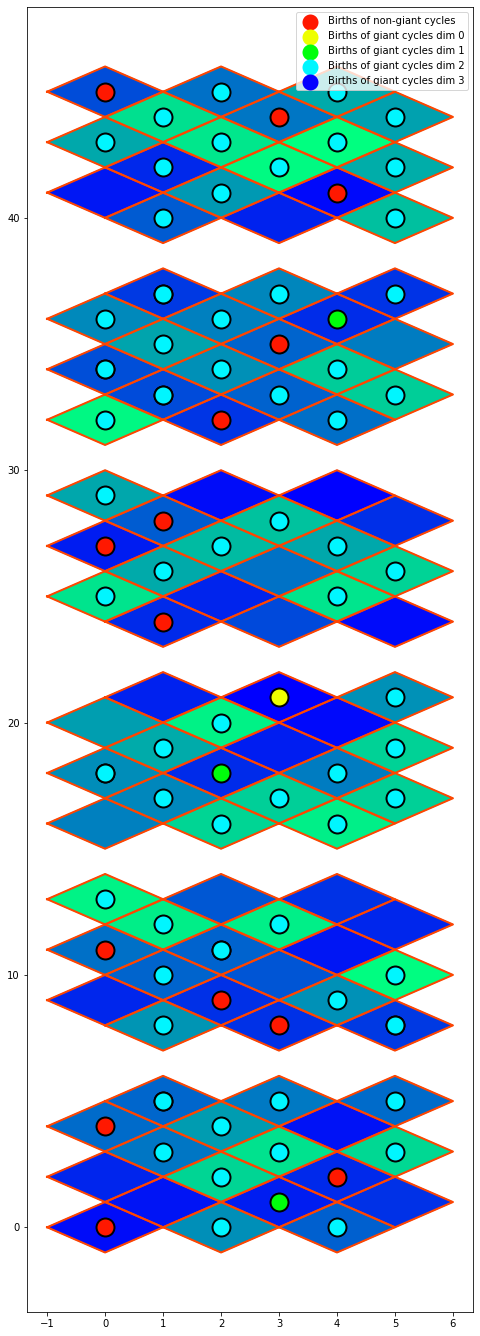

In [11]:
plt.figure(figsize=(8, 24))
fc.draw_filtration()

colors = [cm['gist_rainbow'](0.05 + 0.9*i) for i in np.arange(0, 1.1, 0.2)]
x, y = fc.cords[np.isin(filtration, info[(info['Death'] != np.inf)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[0], linewidth=10, label='Births of non-giant cycles')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[1], linewidth=10, label='Births of giant cycles dim 0')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[2], linewidth=10, label='Births of giant cycles dim 1')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[3], linewidth=10, label='Births of giant cycles dim 2')
x, y = fc.cords[np.isin(filtration, info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]['Birth'].values)].mean(axis=1).transpose()
plt.scatter(x, y, color='black', linewidth=14)
plt.scatter(x, y, color=colors[4], linewidth=10, label='Births of giant cycles dim 3')

plt.legend()
plt.show()

In [12]:
info[info['Death'] != np.inf]

,Birth,Death,Dimension
0,0.051655,0.092708,0
1,0.036517,0.160601,0
2,0.113035,0.184571,0
3,0.160601,0.193946,1
4,0.189895,0.333204,1
5,0.295244,0.355868,1
6,0.224369,0.372958,1
7,0.416857,0.418106,1
8,0.389769,0.444594,1
9,0.398832,0.470520,1


In [13]:
info[(info['Death'] == np.inf)&(info['Dimension'] == 0)]

,Birth,Death,Dimension
24,0.001673,inf,0


In [14]:
info[(info['Death'] == np.inf)&(info['Dimension'] == 1)]

,Birth,Death,Dimension
25,0.117043,inf,1
27,0.170441,inf,1
28,0.174922,inf,1


In [15]:
info[(info['Death'] == np.inf)&(info['Dimension'] == 2)]

,Birth,Death,Dimension
26,0.158179,inf,2
29,0.201850,inf,2
30,0.224369,inf,2
31,0.225260,inf,2
32,0.294283,inf,2
...,...,...,...
241,0.989246,inf,2
242,0.989246,inf,2
243,0.989246,inf,2
244,0.989246,inf,2


In [16]:
info[(info['Death'] == np.inf)&(info['Dimension'] == 3)]

,Birth,Death,Dimension
